In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.shape

(178, 14)

In [4]:
# check null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

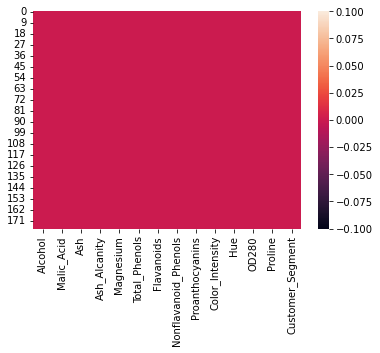

In [5]:
# Visualise null values
sns.heatmap(df.isnull())
plt.show()

In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# How many labels/class in output column
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

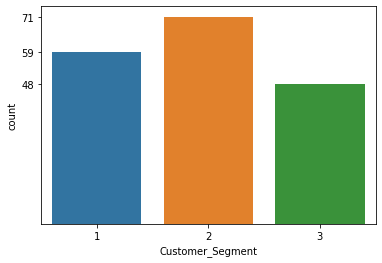

In [8]:
# visualise outout column value_counts
sns.countplot(data=df,x='Customer_Segment')
f=df['Customer_Segment'].value_counts()
plt.yticks(f)
plt.show()

In [9]:
# check data type
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [10]:
# Select input and output
X=df.drop('Customer_Segment',axis=1)   # input
Y=df['Customer_Segment']       # Output

In [11]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)
#stratify=output variablename

In [12]:
Y_train.value_counts()

2    50
1    41
3    33
Name: Customer_Segment, dtype: int64

In [13]:
Y_test.value_counts()

2    21
1    18
3    15
Name: Customer_Segment, dtype: int64

In [14]:
#Apply Scaling : Standard Scaler
#Apply Standard Scaler  on X_train and X_test
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [15]:
# regression = linear
#classification = sigmoid
#more than 2 = softmax

In [16]:
# Create archetecture for Neural network
import tensorflow as tf
# Create model of sequential class
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=13,activation='relu',input_dim=13),   # 1st hidden layer
  # input_shape(X.shape[1],) or input_dim= no. of input
  tf.keras.layers.Dense(units=13,activation='relu'),  # 2nd hidden layer
  tf.keras.layers.Dense(units=13,activation='softmax')   # output layer
                       ])

2022-07-28 12:36:25.869256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-28 12:36:25.869284: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-28 12:36:27.356518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-28 12:36:27.356547: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-28 12:36:27.356567: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (desktop): /proc/driver/nvidia/version does not exist


In [17]:
# To show summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
   #adam means adagrad+RMS propotional
#adagrad means momentum 
#and rms propotional means direction

In [19]:
# Early Stopping :
from tensorflow.keras.callbacks import EarlyStopping
# Callbacks inbuilt parameter pof fit()
# create callbacks:-
# EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [20]:
# Train the model
trained_model=model.fit(X_train,Y_train,epochs=4000,batch_size=5,
                        validation_data=(X_test,Y_test),callbacks=cb)

Epoch 1/4000
25/25 [==============================] - 1s 9ms/step - loss: 2.6362 - accuracy: 0.0081 - val_loss: 2.4799 - val_accuracy: 0.0185
Epoch 2/4000
25/25 [==============================] - 0s 3ms/step - loss: 2.4256 - accuracy: 0.0968 - val_loss: 2.2701 - val_accuracy: 0.2778
Epoch 3/4000
25/25 [==============================] - 0s 3ms/step - loss: 2.2117 - accuracy: 0.3790 - val_loss: 2.0430 - val_accuracy: 0.5556
Epoch 4/4000
25/25 [==============================] - 0s 3ms/step - loss: 1.9671 - accuracy: 0.5323 - val_loss: 1.7670 - val_accuracy: 0.5741
Epoch 5/4000
25/25 [==============================] - 0s 3ms/step - loss: 1.6719 - accuracy: 0.5968 - val_loss: 1.4365 - val_accuracy: 0.6111
Epoch 6/4000
25/25 [==============================] - 0s 3ms/step - loss: 1.3283 - accuracy: 0.6452 - val_loss: 1.0892 - val_accuracy: 0.7037
Epoch 7/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.9849 - accuracy: 0.8065 - val_loss: 0.7869 - val_accuracy: 0.9074
Epoch 

In [21]:
# training loss and training score
model.evaluate(X_train,Y_train)

4/4 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000


[0.005130366887897253, 1.0]

In [22]:
# testing loss and testing score
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9630


[0.06717148423194885, 0.9629629850387573]

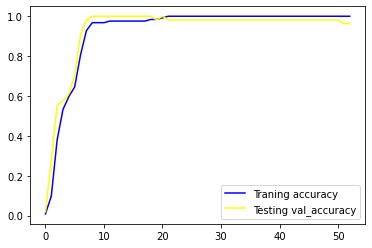

In [23]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['accuracy'],color='blue',label='Traning accuracy')
plt.plot(trained_model.history['val_accuracy'],color='yellow',label='Testing val_accuracy')
plt.legend()
plt.show()

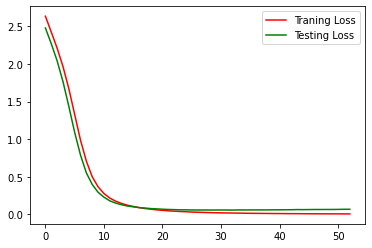

In [24]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['loss'],color='red',label='Traning Loss')
plt.plot(trained_model.history['val_loss'],color='green',label='Testing Loss')
plt.legend()
plt.show()

In [25]:
# testing the model
Y_pred=model.predict(X_test).round(2)   # gives the prob predict 
# of each class for row
Y_pred

2/2 [==============================] - 0s 2ms/step


array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 

In [26]:
# List comprehension
Y_pred=[np.argmax(i) for i in Y_pred]
# list object=[expression for var in itrable]
Y_pred

[3,
 3,
 3,
 2,
 2,
 1,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 3]

In [27]:
# Print Report
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.95      0.95      0.95        21
           3       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54

[[17  1  0]
 [ 0 20  1]
 [ 0  0 15]]
